In [1]:
from re import split
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%pwd

'/home/qiao/dev/giao/havingfun/detecting/segmentation/unet34'

In [3]:
print(torch.cuda.is_available())

True


In [4]:
path = Path('/home/qiao/dev/giao/datasets/M300bounding/')

path_img = path/'S_kaggle_wildfire/'
path_label = path/'S_kaggle_wildfire_label'
codes = ['Smoke', 'Flame', 'Background']
path_img

Path('/home/qiao/dev/giao/datasets/M300bounding/S_kaggle_wildfire')

In [5]:
fnames = get_image_files(path_img)
print(fnames[0])

/home/qiao/dev/giao/datasets/M300bounding/S_kaggle_wildfire/000366.jpg


In [6]:
lbl_names = get_image_files(path_label)
print(lbl_names[0])

/home/qiao/dev/giao/datasets/M300bounding/S_kaggle_wildfire_label/label_000373.jpg


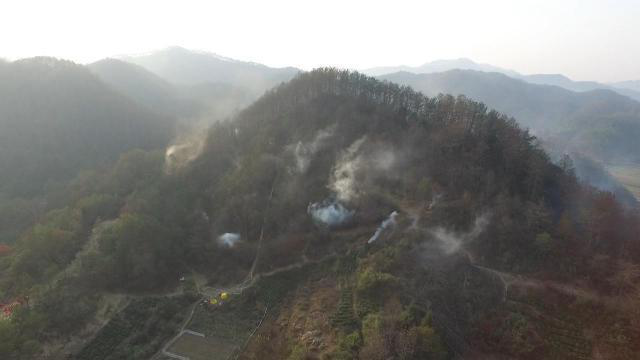

In [7]:
img = Image.open(fnames[0])
img.show()

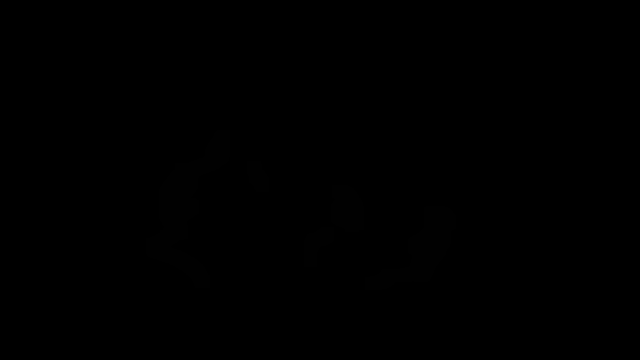

In [8]:
img = Image.open(lbl_names[0])
img.show()

In [9]:
get_y_fn = lambda x: path_label/f'label_{x.name}'
defaults.use_cuda = True

In [10]:
dls = SegmentationDataLoaders.from_label_func(
    path_img,
    bs = 4,
    fnames = fnames,
    label_func = get_y_fn,
    codes = codes,
    item_tfms = [Resize((385, 480))], # wide: 960/2 = 480, hight: 770/2 = 385
    batch_tfms = [Normalize.from_stats(*imagenet_stats)],
)

/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [11]:
name2id = {v:k for k, v in enumerate(codes)}
void_code = name2id['Background']

def acc_smoke(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    # mask = target
    return (input.argmax(dim = 1)[mask]==target[mask]).float().mean()

metrics = acc_smoke

In [12]:
learn = unet_learner(dls, models.resnet34, metrics = metrics,
                    self_attention=True)

In [13]:
device = 'cuda'
learn.model.to(device)

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

SuggestedLRs(valley=7.585775892948732e-05)

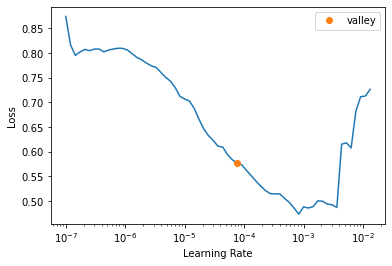

In [14]:
learn.lr_find()

In [15]:
lr = 7.58e-5
learn.fit_one_cycle(35, slice(lr))

epoch,train_loss,valid_loss,acc_smoke,time
0,0.302777,0.205663,0.926900,01:37
1,0.183045,0.143706,0.950365,01:35
2,0.166561,0.132734,0.950029,01:35
3,0.142986,0.103220,0.960040,01:35
4,0.129627,0.097222,0.961824,01:35
5,0.121125,0.100528,0.960665,01:35
6,0.117025,0.093010,0.963516,01:35
7,0.099573,0.087971,0.963573,01:35
8,0.093980,0.082307,0.968026,01:35
9,0.088391,0.085862,0.963661,01:35


/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


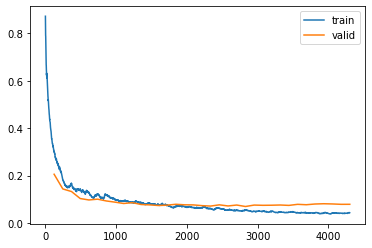

In [16]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [17]:
learn.save('resized-1')
learn.load('resized-1')

SuggestedLRs(valley=5.754399353463668e-06)

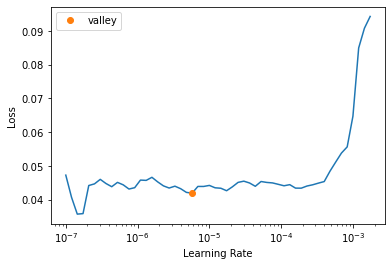

In [18]:
learn.unfreeze()
learn.lr_find()

In [19]:
lr_max = 5.75e-6

In [20]:
learn.fit_one_cycle(6, lr_max)

epoch,train_loss,valid_loss,acc_smoke,time
0,0.043802,0.078984,0.971207,01:40
1,0.040949,0.078642,0.971608,01:40
2,0.040827,0.083629,0.971079,01:40
3,0.039959,0.080414,0.971849,01:40
4,0.039619,0.079925,0.971850,01:41
5,0.039848,0.081262,0.971856,01:41


/home/qiao/anaconda3/envs/dev/lib/python3.9/site-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


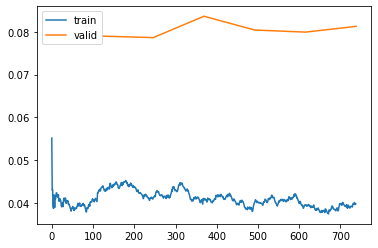

In [21]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

Path('/home/qiao/dev/giao/datasets/M300bounding/S_kaggle_wildfire/models/resized-f.pth')

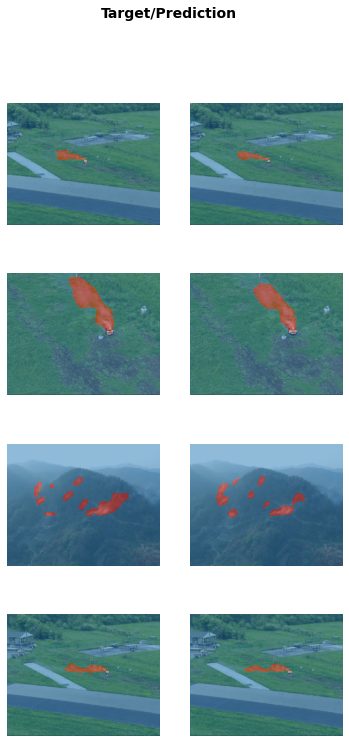

In [22]:
learn.show_results()
learn.save('resized-f')

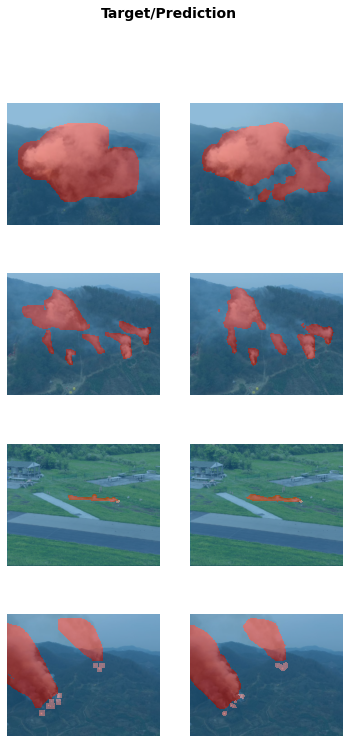

In [23]:
# learn.show_results()
learn.load('resized-f')
learn.show_results()

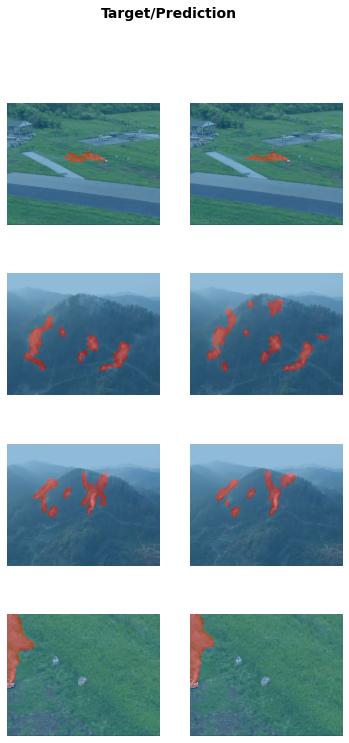

In [24]:
learn.show_results()

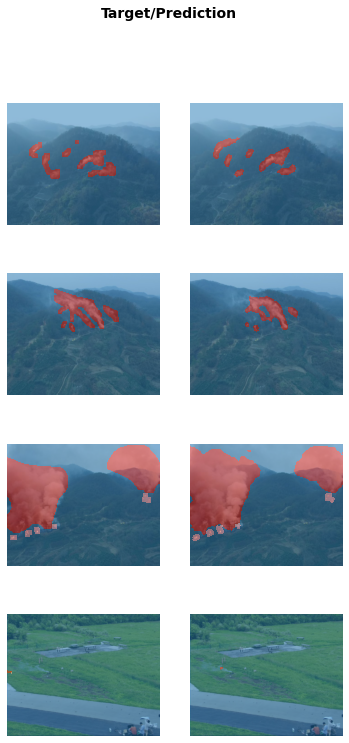

In [25]:
learn.show_results()

In [26]:
# learn.show_results()
# learn.save('alunet')

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

In [ ]:
learn.show_results()

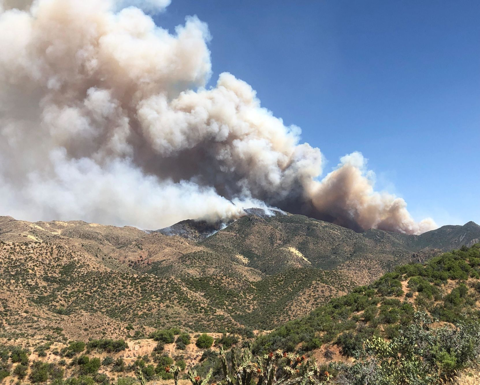

In [29]:
img = Image.open('/home/qiao/dev/giao/datasets/S_google_wildfire/004.png').resize((480, 385))
img.show()

In [30]:
img = PILImage(img)
print(img)

PILImage mode=RGB size=480x385


In [31]:
learn.load('resized-f')
# learn.load('attunet')

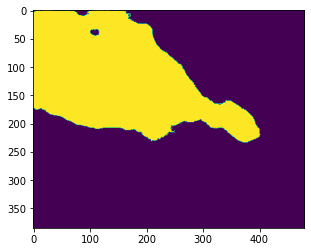

In [32]:
prediction_mask = learn.predict(img)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)

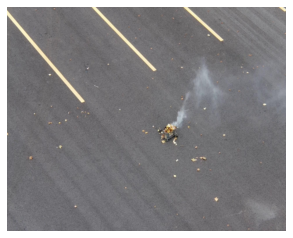

In [33]:
# one time test
import cv2
import numpy as np
from PIL import Image

img = cv2.imread('/home/qiao/dev/giao/datasets/bounding/images/DJI_20211017111122_0003_Z_MP4_1.png')

# You may need to convert the color.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
im_pilimgimg = Image.fromarray(img).resize((480, 385))
img_pil = PILImage(im_pilimgimg)
img_pil.show()

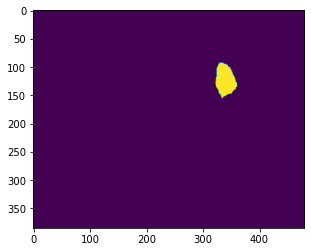

In [34]:
prediction_mask = learn.predict(img_pil)
seg_map = prediction_mask[0]
torch.Tensor.ndim = property(lambda self: len(self.shape))
plt.imshow(seg_map)